In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pytz

In [67]:
# Import Youtube and sleep data
filename = "../youtube_sleep_EZ.csv"
df = pd.read_csv(filename)
df = df.drop(columns=["Unnamed: 0"])
df.head()

,date,total_sleep_hours,sleep_start,sleep_end,time_first,url_first,title_first,type_first,time_last,url_last,title_last,type_last,date_time,session_id,session_duration,had_session,total_videos_watched
0,2025-01-01,7.566667,2025-01-01 01:58:50-05:00,2025-01-01 10:00:20-05:00,11:24:47.221000,https://www.youtube.com/watch?v=LdNcXiYX_GY,the gold titanium apple watch series 10 is abs...,Watched,17:20:12.713000,https://www.youtube.com/watch?v=BuMEDjtWC78,Craftsy’s 99% OFF New Year's Crochet Deal.,Watched,2025-01-01 17:20:12.713000-05:00,3,0 days 00:00:08.270000,True,6
1,2025-01-02,6.608333,2025-01-02 02:10:26-05:00,2025-01-02 08:59:56-05:00,10:42:44.410000,https://www.youtube.com/results?search_query=m...,for moss stitch scarf,Searched,22:42:36.226000,https://www.youtube.com/watch?v=oTbDmSTwZN4,4.0 | Gifting | EN - US | YouTube In-Feed | Ch...,Watched,2025-01-02 22:42:36.226000-05:00,8,0 days 04:23:23.311000,True,45
2,2025-01-03,NaN,NaN,NaN,12:47:15.706000,https://www.youtube.com/watch?v=SRCZ-59k4UA,DMV: Online Degrees & Certificates_App Fee wai...,Watched,13:07:38.305000,https://www.youtube.com/watch?v=-g4dQt57OKo,Bro was a member 💀🤣 #kaneljoseph #funnymoments...,Watched,2025-01-03 13:07:38.305000-05:00,9,0 days 00:00:26.006000,True,35
3,2025-01-04,7.875000,2025-01-04 01:22:05-05:00,2025-01-04 09:34:35-05:00,00:23:09.520000,https://www.youtube.com/watch?v=eymzYuoLJ04,My reaction to big bro come handle this intrud...,Watched,09:57:56.303000,https://www.youtube.com/watch?v=fsU7Wdbcrvo,[MultiSub]没有人硬cue我们昭昭墨墨就是纯甜啊！孟子义每一次撒娇李昀锐都招架不住 ...,Watched,2025-01-04 09:57:56.303000-05:00,11,0 days 00:00:08.783000,True,11
4,2025-01-05,8.775000,2025-01-05 00:32:58-05:00,2025-01-05 09:33:28-05:00,19:34:17.228000,https://www.youtube.com/watch?v=SRCZ-59k4UA,DMV: Online Degrees & Certificates_App Fee wai...,Watched,22:56:39.120000,https://www.youtube.com/watch?v=TDBNltzAg_w,=ENG SUB=天盛長歌 The Rise of Phoenixes 02 陳坤 倪妮 C...,Watched,2025-01-05 22:56:39.120000-05:00,14,0 days 00:07:35.977000,True,39


C:\Users\chery\AppData\Local\Temp\ipykernel_27992\4273217170.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time_last"] = pd.to_datetime(df["time_last"])


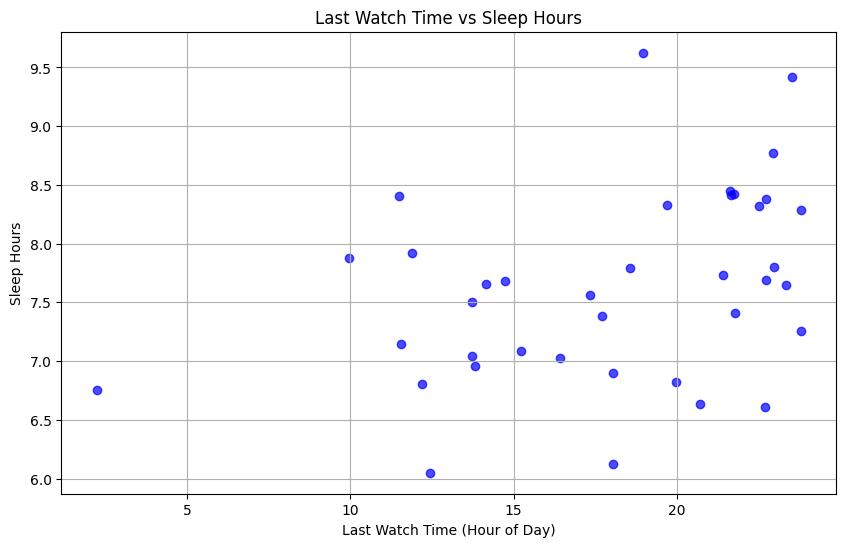

In [68]:
# Convert the last_watch_time into a decimal hour value (e.g., 22:30 -> 22.5)
df["time_last"] = pd.to_datetime(df["time_last"])
df['watch_hour'] = (
    df['time_last'].dt.hour +
    df['time_last'].dt.minute / 60.0
)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['watch_hour'], df['total_sleep_hours'], color='blue', alpha=0.7)

plt.xlabel('Last Watch Time (Hour of Day)')
plt.ylabel('Sleep Hours')
plt.title('Last Watch Time vs Sleep Hours')
plt.grid(True)
plt.show()

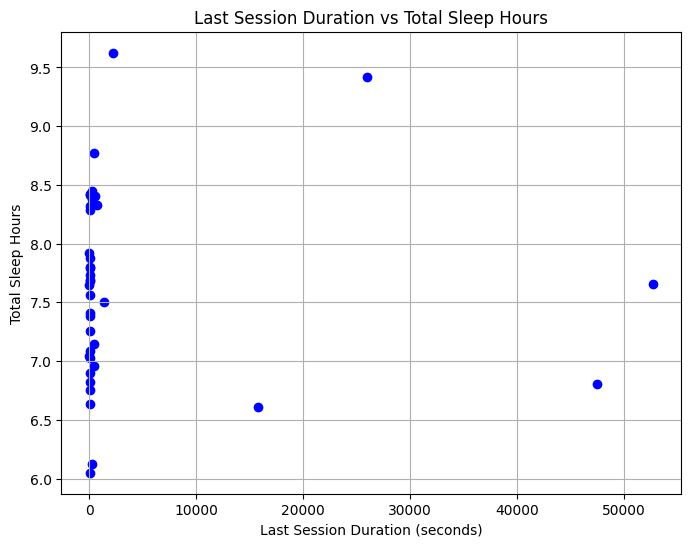

In [69]:
df["session_duration"] = pd.to_timedelta(df["session_duration"])
df['duration_minutes'] = df['session_duration'].dt.total_seconds()

# Plotting: Scatter plot of last session duration vs. total sleep hours
plt.figure(figsize=(8, 6))
plt.scatter(df['duration_minutes'], df['total_sleep_hours'], color='blue', marker='o')

# Adding titles and labels
plt.title('Last Session Duration vs Total Sleep Hours')
plt.xlabel('Last Session Duration (seconds)')
plt.ylabel('Total Sleep Hours')
plt.grid(True)

# Display the plot
plt.show()

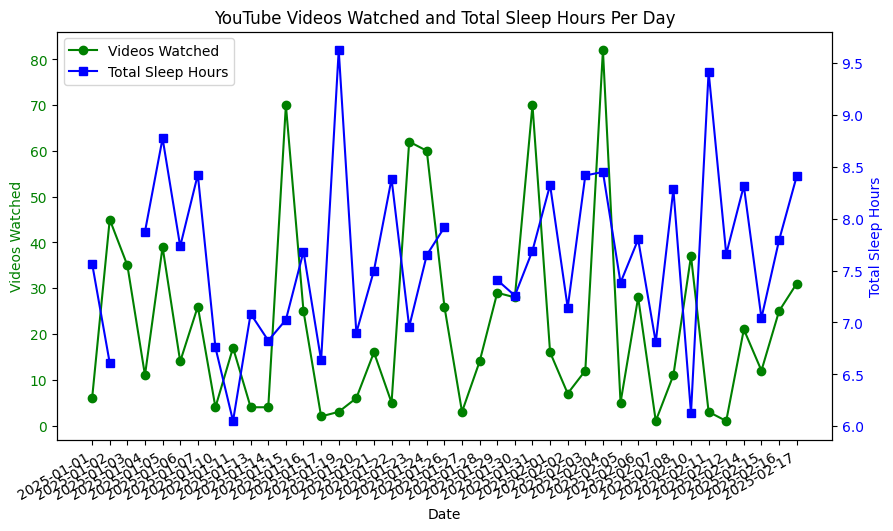

In [70]:
# Plot using dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot videos watched per day on the left y-axis
ax1.plot(df['date'], df['total_videos_watched'], 'g-o', label='Videos Watched')
ax1.set_xlabel('Date')
ax1.set_ylabel('Videos Watched', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis to plot sleep hours
ax2 = ax1.twinx()
ax2.plot(df['date'], df['total_sleep_hours'], 'b-s', label='Total Sleep Hours')
ax2.set_ylabel('Total Sleep Hours', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('YouTube Videos Watched and Total Sleep Hours Per Day')
fig.autofmt_xdate()  # Rotate date labels for better readability

# Optionally, add legends (combining both lines)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

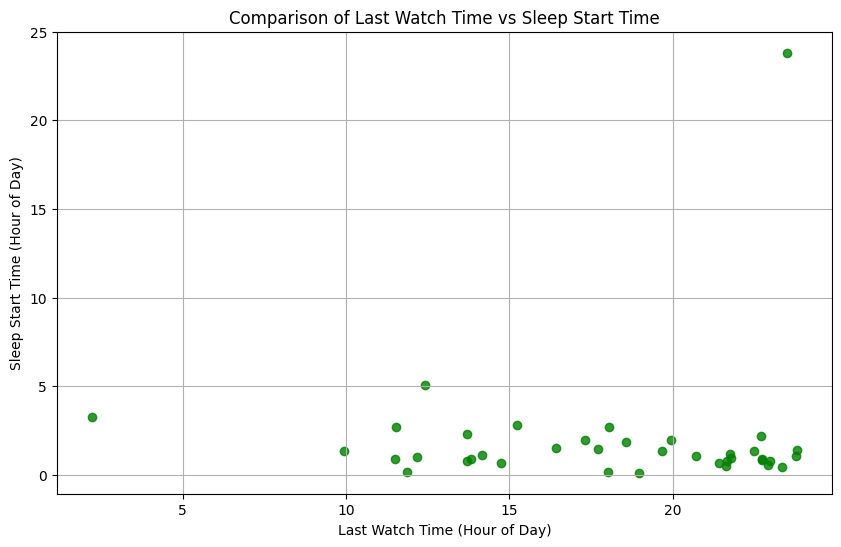

In [71]:
# Convert datetime columns to decimal hours
df["sleep_start"] = pd.to_datetime(df["sleep_start"])
df['sleep_start_hour'] = (
    df['sleep_start'].dt.hour +
    df['sleep_start'].dt.minute / 60.0
)

# Create a scatter plot comparing last watch time with sleep start time
plt.figure(figsize=(10, 6))
plt.scatter(
    df['watch_hour'], 
    df['sleep_start_hour'],
    color='green', alpha=0.8
)

plt.xlabel('Last Watch Time (Hour of Day)')
plt.ylabel('Sleep Start Time (Hour of Day)')
plt.title('Comparison of Last Watch Time vs Sleep Start Time')
plt.grid(True)

# # Optional: Add a reference line (x = y) to visualize differences
# plt.plot([0, 24], [0, 24], 'r--', alpha=0.5)
# plt.xlim(0, 24)
# plt.ylim(0, 24)

plt.show()

C:\Users\chery\AppData\Local\Temp\ipykernel_27992\1579101353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type_last", y="total_sleep_hours", data=df, palette="Set2")


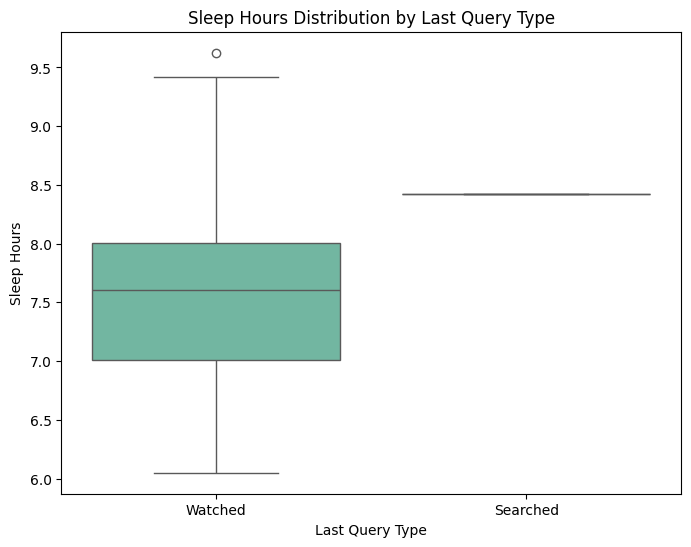

In [72]:
# Visualization 1: Boxplot comparing the distribution of sleep hours
plt.figure(figsize=(8, 6))
sns.boxplot(x="type_last", y="total_sleep_hours", data=df, palette="Set2")
plt.title("Sleep Hours Distribution by Last Query Type")
plt.xlabel("Last Query Type")
plt.ylabel("Sleep Hours")
plt.show()